In [ ]:
import pandas as pd
import numpy as np
import os
# os is used to acess files and to perform functions to manage files
from sklearn.svm import SVC
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [ ]:
os.listdir('/content/drive/MyDrive/Data')
# lisdirectory shows everything in the folder as a list

['Cat', 'Dog']

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Cat'))

60

In [ ]:
len(os.listdir('/content/drive/MyDrive/Data/Dog'))

66

In [ ]:
datadir='/content/drive/MyDrive/Data'
lst=os.listdir(datadir)
print(lst)
for i in lst:
  subpath=os.path.join(datadir,i)
  print(subpath)
  images=os.listdir(subpath)
  print(images)
  for i in images:
    imgpath=os.path.join(subpath,i)
    print(imgpath)


['Cat', 'Dog']
/content/drive/MyDrive/Data/Cat
['images.jpeg', 'cat.41.jpg', 'download.jpeg', 'images9.jpeg', 'cat.8.jpg', 'download1.jpeg', 'download8.jpeg', 'cat.7.jpg', 'cat.42.jpg', 'cat.44.jpg', 'cat.18.jpg', 'cat.3 - Copy.jpg', 'cat.11.jpg', 'cat.10.jpg', 'cat.27.jpg', 'cat.53.jpg', 'cat.15.jpg', 'cat.48.jpg', 'cat.21.jpg', 'cat.29.jpg', 'cat.39.jpg', 'cat.31.jpg', 'cat.54.jpg', 'cat.47.jpg', 'download5.jpeg', 'cat.52.jpg', 'cat.43.jpg', 'cat.50.jpg', 'cat.16.jpg', 'download7.jpeg', 'download4.jpeg', 'cat.14.jpg', 'cat.20.jpg', 'cat.4 - Copy.jpg', 'cat.30.jpg', 'download2.jpeg', 'cat.35.jpg', 'cat.38.jpg', 'cat.1 - Copy.jpg', 'cat.5.jpg', 'cat.5 - Copy.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.2 - Copy.jpg', 'cat.33.jpg', 'download6.jpeg', 'downloadcat.jpeg', 'cat.17.jpg', 'cat.49.jpg', 'cat.51.jpg', 'cat.28.jpg', 'cat.40.jpg', 'cat.32.jpg', 'cat.9.jpg', 'cat.34.jpg', 'cat.36.jpg', 'download3.jpeg', 'cat.46.jpg', 'cat.37.jpg', 'cat.24.jpg']
/content/drive/MyDrive/Data/Cat/images.jpe

In [ ]:
photo=imread('/content/drive/MyDrive/Data/Dog/dog.12.jpg')
photo

array([[[ 77, 142, 198],
        [ 75, 140, 196],
        [ 77, 141, 202],
        ...,
        [ 16,  14,  17],
        [ 14,  12,  13],
        [ 14,  12,  13]],

       [[ 86, 151, 207],
        [ 82, 147, 203],
        [ 79, 143, 204],
        ...,
        [ 16,  14,  17],
        [ 14,  12,  13],
        [ 14,  12,  13]],

       [[ 95, 160, 216],
        [ 89, 154, 210],
        [ 83, 147, 208],
        ...,
        [ 15,  13,  16],
        [ 13,  11,  12],
        [ 13,  11,  12]],

       ...,

       [[192, 121,  75],
        [182, 111,  65],
        [175, 102,  57],
        ...,
        [163,  67,  27],
        [159,  66,  23],
        [159,  66,  23]],

       [[182, 108,  61],
        [165,  91,  44],
        [150,  73,  27],
        ...,
        [178,  82,  40],
        [168,  72,  30],
        [168,  72,  30]],

       [[171,  91,  40],
        [165,  85,  36],
        [150,  68,  20],
        ...,
        [154,  58,  16],
        [161,  64,  22],
        [161,  63,  24]]

In [ ]:
photo.shape

(161, 98, 3)

In [ ]:

Categories=['Cat','Dog']
datadir='/content/drive/MyDrive/Data'

In [ ]:
data=[]
target=[]
for i in Categories:
  print('loading category.....',i)
  paths=os.path.join(datadir,i)
  images=os.listdir(paths)
  for img in images:
    imgpath=os.path.join(paths,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,3))
    data.append(img_resize.flatten())
    target.append(Categories.index(i))
    print('loaded category.....',i)


loading category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat
loaded category..... Cat

In [ ]:
df=pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.866723,0.937311,0.976527,0.871291,0.941879,0.981095,0.877716,0.948305,0.987520,0.881308,...,0.203221,0.289858,0.231564,0.157584,0.345476,0.294443,0.227843,0.353565,0.302585,0.239783
1,0.268848,0.272769,0.253161,0.268848,0.272769,0.253161,0.268848,0.272770,0.253162,0.270758,...,0.163944,0.305962,0.231452,0.172628,0.301612,0.227102,0.168278,0.300758,0.226249,0.167425
2,0.019565,0.023487,0.003879,0.019526,0.023448,0.003840,0.019402,0.023324,0.003716,0.019519,...,0.115346,0.391870,0.195922,0.105726,0.366772,0.175478,0.085282,0.358876,0.169046,0.078849
3,0.984314,0.847059,0.831373,0.984314,0.847059,0.831373,0.984314,0.847059,0.831373,0.984314,...,0.910501,0.941355,0.890196,0.917647,0.941267,0.890287,0.917738,0.945060,0.894079,0.921530
4,0.154480,0.091735,0.103500,0.169038,0.106293,0.117328,0.167667,0.104989,0.107658,0.153240,...,0.413041,0.386023,0.368375,0.356778,0.370647,0.342864,0.333848,0.356371,0.347214,0.332845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.469687,0.497138,0.610864,0.520082,0.547533,0.661259,0.546655,0.574106,0.687831,0.500478,...,0.710503,0.521002,0.552375,0.697473,0.531836,0.563209,0.708307,0.529984,0.561357,0.706455
122,0.282480,0.176598,0.149147,0.263496,0.157613,0.130162,0.247879,0.141997,0.114546,0.244835,...,0.512418,0.432193,0.445754,0.481071,0.494081,0.522637,0.566821,0.545343,0.581017,0.622002
123,0.391491,0.419671,0.282772,0.385622,0.433520,0.286712,0.378182,0.455436,0.294385,0.325471,...,0.244040,0.386638,0.419167,0.324269,0.309277,0.339090,0.250009,0.270845,0.292507,0.207303
124,0.592301,0.636024,0.467658,0.643088,0.689688,0.504767,0.654429,0.701192,0.512705,0.689096,...,0.484030,0.494937,0.492173,0.343318,0.521991,0.519431,0.370331,0.564989,0.571310,0.419112


In [ ]:
X=np.array(data)
X.shape

(126, 67500)

In [ ]:
y=np.array(target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
sm=SVC()
sm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=sm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

confmatrix: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x79fac24eead0>
classification:               precision    recall  f1-score   support

           0       0.42      0.73      0.54        15
           1       0.67      0.35      0.46        23

    accuracy                           0.50        38
   macro avg       0.54      0.54      0.50        38
weighted avg       0.57      0.50      0.49        38



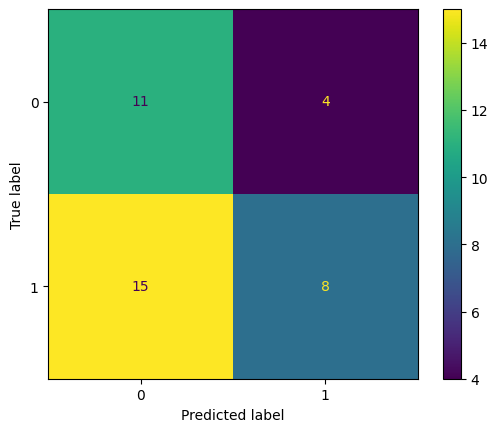

In [ ]:
print('confmatrix:',ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('classification:',classification_report(y_test,y_pred))


In [ ]:
img=imread('/content/drive/MyDrive/kitten.jpg')
img

array([[[237, 220, 213],
        [237, 220, 213],
        [237, 220, 213],
        ...,
        [183, 181, 182],
        [180, 178, 179],
        [180, 178, 179]],

       [[237, 220, 213],
        [237, 220, 213],
        [236, 219, 212],
        ...,
        [183, 181, 182],
        [183, 181, 182],
        [183, 181, 182]],

       [[236, 219, 212],
        [236, 219, 212],
        [236, 219, 212],
        ...,
        [183, 181, 182],
        [184, 182, 183],
        [184, 182, 183]],

       ...,

       [[168, 176, 189],
        [169, 177, 190],
        [170, 178, 191],
        ...,
        [162, 174, 186],
        [159, 171, 183],
        [159, 171, 183]],

       [[168, 176, 189],
        [170, 178, 191],
        [172, 180, 193],
        ...,
        [162, 174, 186],
        [160, 172, 184],
        [160, 172, 184]],

       [[166, 176, 188],
        [167, 177, 189],
        [168, 178, 190],
        ...,
        [165, 175, 187],
        [162, 172, 184],
        [162, 172, 184]]

In [ ]:
X.shape

(126, 67500)

In [ ]:
img1=resize(img,(150,150,3)).flatten()
img1

array([0.92785976, 0.85825685, 0.83624124, ..., 0.63328586, 0.68366165,
       0.73517785])

In [ ]:
img1=img1.reshape(1,-1)
img1.shape

(1, 67500)

In [ ]:
y_new=sm.predict(img1)
print(Categories[y_new.item()])

Cat
